In [20]:
import numpy as np
import collections
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
np.set_printoptions(suppress=True, precision=2)
plt.style.use('seaborn') # pretty matplotlib plots

In [2]:
text_file = open("training_data.txt", "r")
train_N = text_file.read().split(' ') #N = Total no, of words from training set
K = list(set(train_N)) #K = 10,000 distinct words
c = collections.Counter(train_N)#c is a dictionary of 10,000 distinct words

In [3]:
new_test = open("test_data.txt", "r")
ttesting = new_test.read().split(' ') #all the words from test set

In [4]:
training_sets = []
training_sets.append(train_N[:5000]) #N/128
training_sets.append(train_N[:10000]) #N/64 
training_sets.append(train_N[:40000]) #N/16
training_sets.append(train_N[:160000]) #N/4
training_sets.append(train_N) #N

In [5]:
#training
models = []
for each_train in training_sets:
    dictionary = collections.Counter(each_train)
    N = len(each_train) #5000 10000 ... 640000
    model = collections.Counter()
    for word in each_train:
        model[word] = dictionary[word]/N
    
    models.append(model)


In [6]:
def perplexity(model, run_test, token):
    
    N = len(run_test)
    K = len(list(set(run_test)))
    
    probability = np.zeros(len(run_test))
    for index,word in enumerate(run_test):
        probability[index] = model[word]


    for i in range(len(probability)):
        if probability[i] == 0:
            if token == 'ML':
                probability[i] = np.log(0.0000000000000001)
            elif token == 'MAP':
                probability[i] = np.log(1/(N+K))
            elif token == 'PP':
                probability[i] = np.log(2/(N+(2*K)))  
        else:
            probability[i] = np.log(probability[i])
    
    pp = np.exp((-1/N)*np.sum(probability))
    return pp

In [7]:
#MAP
#ALPHA = HOW MANY TIMES I HAVE TRIED?
#training
MAP_models = []
for each_train in training_sets:
    dictionary = collections.Counter(each_train)
    N = len(each_train) #5000 10000 ... 640000
    MAP_model = collections.Counter()

    K = len(list(set(each_train)))


    for word in each_train:
        
        MAP_model[word] = (dictionary[word]+1)/(N+K)
    
    MAP_models.append(MAP_model)


In [8]:
#Predictive distribution
#training
p_models = []
for each_train in training_sets:
    dictionary = collections.Counter(each_train)
    N = len(each_train) #5000 10000 ... 640000
    p_model = collections.Counter()

    K = len(list(set(each_train)))

    for word in each_train:
        p_model[word] = (dictionary[word]+2)/(N+(2*K))

    p_models.append(p_model)

In [32]:
def plot_data(mlmodels,mapmodel,pmodel,training,testing):
    
    #2 plots training & testing
    training_ml = []
    training_map = []
    training_p = []
    testing_ml = []
    testing_map = []
    testing_p = []
    
    for index in range(len(mlmodels)):

        temp_ml = perplexity(mlmodels[index],training[index],'ML')
        training_ml.append(temp_ml)
        
        temp_test_ml = perplexity(mlmodels[index],testing,'ML')
        testing_ml.append(temp_test_ml)
        
        temp_map = perplexity(mapmodel[index],training[index],'MAP')
        training_map.append(temp_map)
        
        temp_test_map = perplexity(mapmodel[index],testing,'MAP')
        testing_map.append(temp_test_map)
        
        temp_p = perplexity(pmodel[index],training[index],'PP')
        training_p.append(temp_p)
        
        temp_test_p = perplexity(pmodel[index],testing,'PP')
        testing_p.append(temp_test_p)
    
    plt.plot(training_ml,'-o',label="training_ml")
    plt.plot(training_map,'-o',label="training_map")
    plt.plot(training_p,'-o',label="training_p")
    plt.xlabel('Training set size')
    plt.ylabel('Perplexity')
    plt.legend(loc='upper right')
    plt.title("Training perplexity")
    plt.show()
    
    plt.plot(testing_ml,'-o',label="testing_ml")
    plt.plot(testing_map,'-o',label="testing_map")
    plt.plot(testing_p,'-o',label="testing_p")
    plt.xlabel('Training set size')
    plt.ylabel('Perplexity')
    plt.ylim(0,120000)
    plt.legend(loc='upper right')
    plt.title("Testing perplexity")
    plt.show()
            
    print('training_ml ',training_ml)
    print('training_map ',training_map)
    print('training_p ',training_p)


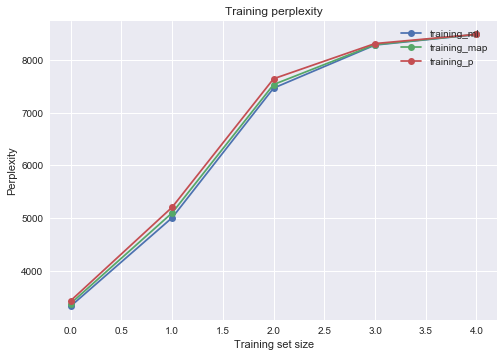

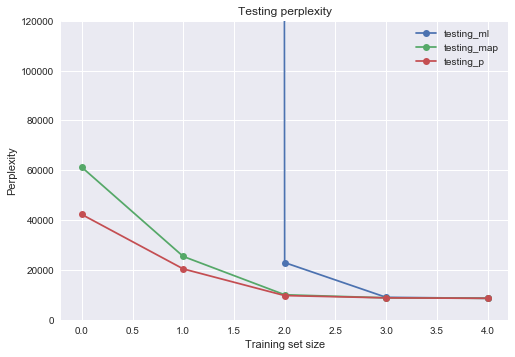

training_ml  [3337.690524397834, 5010.339877610956, 7462.089806827618, 8276.528623568503, 8476.509205359362]
training_map  [3387.826879420287, 5101.554684761132, 7529.586302367567, 8285.11691654772, 8477.06047745051]
training_p  [3441.0784246182743, 5208.625393009375, 7639.154287497914, 8304.512744201429, 8478.567423048906]


In [33]:
plot_data(models,MAP_models,p_models,training_sets,ttesting)